# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd



df = pd.read_csv('data/human_body_temperature.csv')

# Question 1

In [13]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


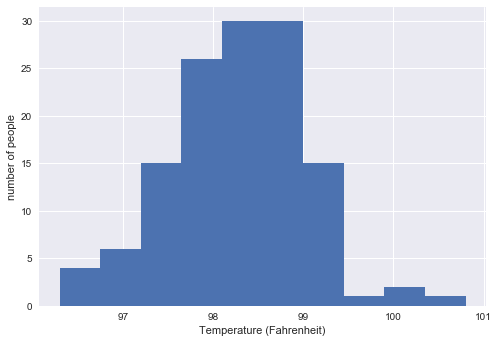

In [17]:
# plot a historgram of temperature
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
_ = plt.hist(df['temperature'], bins=10)
_ = plt.xlabel('Temperature (Fahrenheit)')
_ = plt.ylabel('number of people')
plt.show()

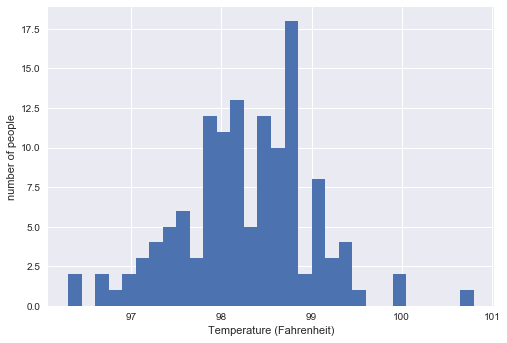

In [41]:
# plot a historgram of temperature with a different bin size 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
_ = plt.hist(df['temperature'], bins=30)
_ = plt.xlabel('Temperature (Fahrenheit)')
_ = plt.ylabel('number of people')
plt.show()

In [39]:
## plot the ecdf instead of a histogram because of binning bias 
## compare the ecdf of simulated and real data 

# a function to get the x and y axes for an ecdf plot
import numpy as np
## write a function to get the x and y for ecdf from data 
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1, dtype = float) / n #returns evenly spaces values between 1 and n+1
    return x, y

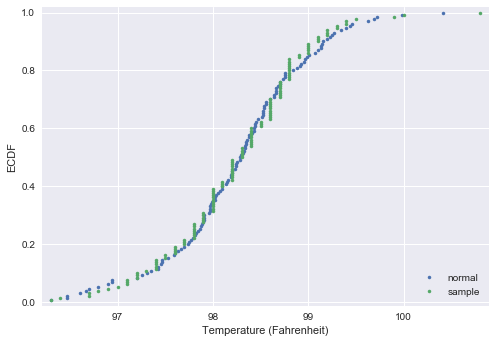

In [52]:
#caluculate the mean standard deviation and sample size to compare the sampel distribution to a normal distribution. 

mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
n = len(df['temperature'])
#simulate a normal distribution from mean and std of real data 
norm_temp= np.random.normal(mean, std, n) 

x,y = ecdf(df['temperature'])
x_norm,y_norm = ecdf(norm_temp)
_ = plt.plot(x_norm,y_norm, marker='.', linestyle='none')
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.legend(('normal','sample'), loc='lower right')
_ = plt.xlabel('Temperature (Fahrenheit)')
_ = plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges
plt.show()

In [73]:
from scipy import stats
stats.shapiro(df['temperature'])

(0.9865770936012268, 0.233174666762352)

### The sample temperature data overlaps with the simulated normal distribution and the Shapiro Wilk test statistic (to test for normality) shows that we cannot reject the null hypothesis suggesting that the data are normally distributed 

# Question 2

In [135]:
print("The sample size is " + str(n))

The sample size is 130


### The sample size is greater than 30 (rule of thumb for CLT) so it is large enough and the sample should be normally distributed regardless of the population distribution. Based on the data we have, the temperatures measured from each individual should be indepenent of each other (unless they were collected from one geographic region or have some other form of autocorrelation ) 

# Question 3

In [136]:
from scipy import stats
print("The sample mean is " + str(mean))
pop_mean = 98.6
t_stat, p_value = stats.ttest_1samp(df['temperature'], pop_mean)
print("The t-statistic is " + str(t_stat) + "and the p-value is " + str(p_value))

The sample mean is 98.2492307692
The t-statistic is -5.45482329236and the p-value is 2.41063204156e-07


###  If the sample is infact representative of the human population, the sample mean indicates that the population mean should be 98.24 as opposed to 98.6.
### It is appropriate to use a one-tailed test because we are comparing a distribution to a known mean as opposed to another distribution with unknown directionality. 
### It is appropriate to use the t-statistic because we don't know the standard deviation of the population (we are infering this from the standard error of the sample). 

In [137]:
from scipy import stats
se = std/np.sqrt(n)
z_score = (mean-pop_mean)/se
p_value = stats.norm.sf(abs(z_score))
print("The z-statistic is " + str(z_score) + "and the p-value is " + str(p_value))

The z-statistic is -5.47592520208and the p-value is 2.17615758294e-08


### The result is not different because the sample size is large. When sample sizes are large the t-distribution approximates the normal distribution 

# Question 4

In [138]:
small_sample = np.random.choice(df['temperature'], size=10)


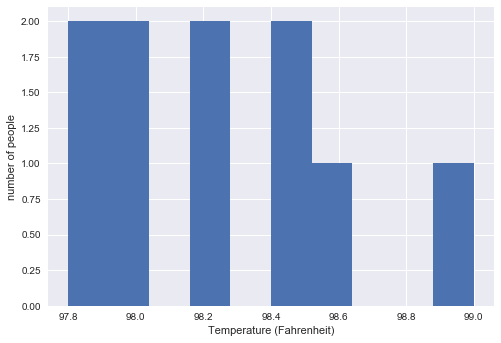

In [139]:
## ploting histogram of small sample
sns.set()
_ = plt.hist(small_sample, bins=10)
_ = plt.xlabel('Temperature (Fahrenheit)')
_ = plt.ylabel('number of people')
plt.show()

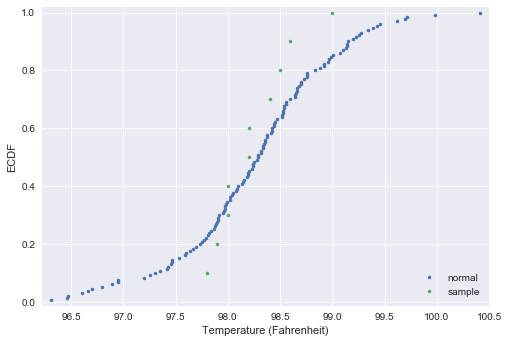

In [140]:
## ploting ecdf of small sample and comparing it to a normal distribution 
x_small,y_small = ecdf(small_sample)
x_norm,y_norm = ecdf(norm_temp)
_ = plt.plot(x_norm,y_norm, marker='.', linestyle='none')
_ = plt.plot(x_small,y_small, marker='.', linestyle='none')
_ = plt.legend(('normal','sample'), loc='lower right')
_ = plt.xlabel('Temperature (Fahrenheit)')
_ = plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges
plt.show()

In [141]:
t_stat, p_valuet = stats.ttest_1samp(small_sample, pop_mean)
se_small = np.std(small_sample)/np.sqrt(10)
z_score = (np.mean(small_sample)-pop_mean)/se_small
p_valuez = stats.norm.sf(abs(z_score))
print("The t-statistic is " + str(t_stat) + "and the p-value is " + str(p_valuet))
print("The z-statistic is " + str(z_score) + "and the p-value is " + str(p_valuez))

The t-statistic is -2.91547594742and the p-value is 0.0171576592249
The z-statistic is -3.07318148576and the p-value is 0.00105894821199


## Because the sub sampled data is are no longer normally distributed the z-test (and the t-test) are not appropriate. However, the t-distribution tends to perform more accurately with small sample sizes 

# Question 5

In [142]:
#margin of error (95%) = z-value * standard error, The the z-value for 95% is 1.96 
MOE = 1.96 * se
CI = (mean-MOE,mean+MOE )
print("The 95% margin of error is " + str(MOE) + "and the confidence interval is " + str(CI))


The 95% margin of error is 0.125550964803and the confidence interval is (98.123679804428193, 98.374781734033363)


### the 95% CI shows that the mean body temperature should fall between (98.12, 98.37) 95% of the time. However, this does not imply that 95% of the population should have this range of body temperature. Normal body temperature should fall within the 2.5 and and  97.5 percentiles of the distribution. 

In [143]:
#Caluclating the 2.5 and and  97.5 percentiles of the distribution
top_per, bottom_per = np.percentile(df['temperature'],[2.5,97.5])
print("Normal body temperature should fall between the range of " + str(top_per) + "and " + str(bottom_per))

Normal body temperature should fall between the range of 96.7225and 99.4775


# Question 6

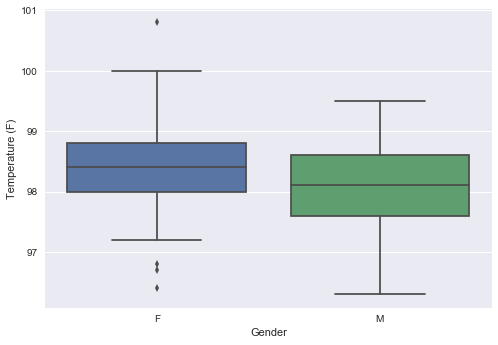

In [145]:
## ploting histogram of small sample
sns.set()
ax = sns.boxplot(x="gender", y="temperature", data=df)
ax.set_xlabel("Gender")
ax.set_ylabel("Temperature (F)")
plt.show()

In [148]:
male = df['temperature'].loc[(df.gender == 'M')]
female = df['temperature'].loc[(df.gender == 'F')]
t_stat_gender,p_value_gender =  stats.ttest_ind(male, female)
print("The t-statistic is " + str(t_stat_gender) + "and the p-value is " + str(p_value_gender))
print("Women are " + str(round(np.mean(female)-np.mean(male),2)) + " F warmer than men")

The t-statistic is -2.28543453817and the p-value is 0.0239318831224
Women are 0.29 F warmer than men


### Women tend to have slighly higher body temperature compared to men as indicated in the graph and as supported by the two-tailed t-test which shows that the means are signifcantly different from each other with alpha = 0.05. The two-tailed t-test is appropriate here because we are comparing the means of two normally distributed samples where one distribution can have a higher mean than the other in any direction.   

## Our exploratory analyses suggest that the mean human body temperature should fall in the range of 98.12, 98.37 (with 95% confidence) and is not actually 98.6 as was first reported by Carl Wunderlich. Our sample sizes are large enough to make this inference about the population as long as the sample is representative of the population. Our data also show that women are on average 0.29 F warmer compared to men.  